# 매출액과 문의량은 상관관계가 있을까?

## 생각해 봐야 할 것
1. 제품의 판매 개수가 아닌 매출액으로 보는 게 맞을까? 
- 매출액은 할인/이벤트 등의 영향을 받음
- 제품 가격 또한 판매 시기에 따라 변동됨으로 판매 개수를 분석하는 것도 고려
=> but 현재 제품별 판매 개수 데이터가 없음으로 매출액으로 분석 진행

2. 매출액에 따른 전화문의량이 상관관계가 있을까?
3. 매출액에 따른 톡문의량이 상관계가 있을까?
- 전화문의 및 톡문의는 고객이 구매 결정에 영향을 미칠 가능성이 크지만 직접적인 매출과 연결되지 않을 수도 있음
- 따라서 매출보다는 구매 전환율로 보는 게 더 정확할 것 같음 (but 데이터 없음)
=> 데이터의 부재로 인해 전화량 및 톡문의와 매출액에 대한 단순 상관관계만 분석 가능
=> 문의 유형을 제품상담, 컴플레인, 주문상담 등으로 나뉘어 진행하면 구매 전환율 진행에 더욱 효과적일거라 생각

## 해야할 순서
1. 월별 매출액과 문의량을 정리  
2. 각 변수에 맞는 분석법을 적용 (상관분석, 회귀분석, anova, t-test.. 등등)
3. 해석을 하며 추가 분석을 진행

## 분석법 선택
문의량과 매출액 변수들이 연속형   
=> 따라서 anova나 t-test는 어려움  
=> 상관분석과 회귀분석을 진행

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# 엑셀 파일 불러오기 (파일 경로 수정)
file_path = r"C:\Users\User\my_workplace_GY\data\매출액과문의량분석자료.xlsx"
df = pd.ExcelFile(file_path)
# 첫 번째 시트 로드
data = df.parse('Sheet1')
# 결측치 제거
data = data.dropna()

In [2]:
# 상관분석 진행
correlation_matrix = data[['매출액(백만)', '전화량(통합)', '카톡문의', '톡톡문의', '톡문의합계']].corr()

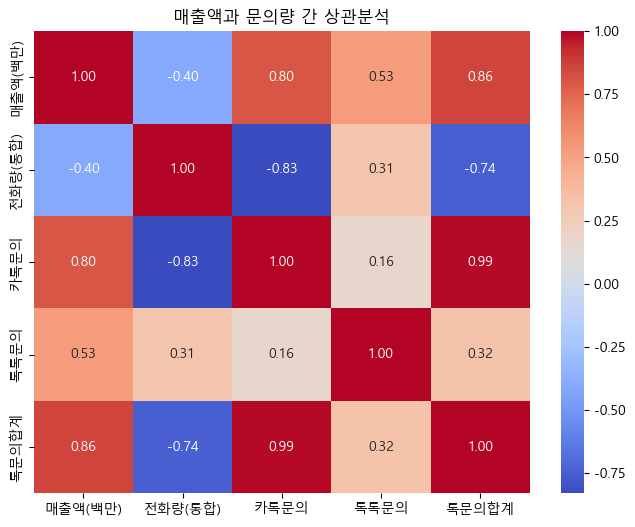

In [3]:
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# '마이너스 기호(-)'가 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False  

# 상관계수 히트맵으로 출력해보기
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("매출액과 문의량 간 상관분석")
plt.show()

# 상관분석 해석
톡문의합계-매출액: 0.886 -> 가장 강한 양의 상관관계  
카톡문의-매출액: 0.831 -> 강한 양의 상관관계  
톡톡문의-매출액: 0.642 -> 다소 높은 양의 상관관계  
전화량(통합)-매출액: -0.402 -> 약한 음의 상관관계  
=> 톡문의합계 및 카톡문의가 증가할수록 매출이 증가  
=> 전화량(통합)과 매출액은 음의 상관관계를 가지므로 전화 문의량이 많다고 반드시 매출이 증가하는 것은 아닐 수 있음

In [4]:
# 일단은 다중 회귀분석 진행을 해보자 (매출액 ~ 전화량(통합), 카톡문의, 톡톡문의, 톡문의합계)
X_multi = data[['전화량(통합)', '카톡문의', '톡톡문의', '톡문의합계']]
Y = data['매출액(백만)']
X_multi = sm.add_constant(X_multi)  # 상수항 추가
model_multi = sm.OLS(Y, X_multi).fit()
print("\n 다중 회귀분석 결과:")
model_multi.summary()


 다중 회귀분석 결과:


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                매출액(백만)   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     4.643
Date:                Wed, 29 Jan 2025   Prob (F-statistic):              0.182
Time:                        20:26:00   Log-Likelihood:                -16.265
No. Observations:                   6   AIC:                             40.53
Df Residuals:                       2   BIC:                             39.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -55.6325    137.728     -0.404      0.725    -648.230     536.965
전화량(통합)        0.1602      0.159      1.005      0.421      -0.526       0.846
카톡문의           0.1323      0.196      0.676      0.569      -0.709       0.974
톡톡문의          -0.0448      0.290     -0.155      0.891      -1.292       1.202
톡문의합계          0.0875      0.101      0.864      0.479      -0.348       0.523
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.296
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.544
Skew:                          -0.292   Prob(JB):                        0.762
Kurtosis:                       1.645   Cond. No.                     4.82e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.32e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 문제 발생
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
- 실제 데이터이긴 하나 샘플 수가 너무 적어서(8개 미만) 이어서 정규성 검정이 제대로 실행되기 어려움, 즉 회귀분석 신뢰도가 낮을 수 있음

# 다중 회귀분석 해석
### R-squared (결정계수): 0.874
- 매출액 변동의 87.4%이지만 샘플 수가 적어 조정된 R-squared가 0.686으로 낮음

### P-value
전화량(통합): 0.421 (유의x)  
카톡문의: 0.569 (유의x)  
톡톡문의: 0.891 (유의x)  
톡문의합계: 0.479 (유의x)  
=> 모든 변수의 P-value가 0.05보다 커서 통계적으로 유의한 관계X

### 다중공선성 가능성
2.66e+17 -> 다중공선성 가능성 높음  
=> 독립변수들끼리 상관관계가 높아 분석에 영향을 미칠 가능성O

# 한계
- 샘플 수가 적어 신뢰할 만한 결과를 도출하기 어려움 -> 더 많은 월별 데이터 필요(추후 데이터 축적에 따라 해결될 예정)  
- 변수들 간의 다중공선성 제거 -> 독립변수 중 하나를 제거하고 다시 분석  
- 톡문의합계가 상관분석에서 가장 높은 상관관계를 가졌으므로 단순회귀 분석으로 진행

# 단순 회귀분석 진행 (매출액 ~ 톡문의합계) 23.01~23.09

In [5]:
# 톡문의합계는 9월까지의 자료가 있음으로 해당 자료까지 활용
df = pd.ExcelFile(file_path)
# 첫 번째 시트 로드
data = df.parse('Sheet1')
data = data.loc[:8]

In [6]:
X_simple = data[['톡문의합계']]
Y = data['매출액(백만)']
X_simple = sm.add_constant(X_simple)  # 상수항 추가
model_simple = sm.OLS(Y, X_simple).fit()
print("\n 단순 회귀분석 결과:")
model_simple.summary()


 단순 회귀분석 결과:

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                매출액(백만)   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     25.60
Date:                Wed, 29 Jan 2025   Prob (F-statistic):            0.00146
Time:                        20:26:00   Log-Likelihood:                -26.636
No. Observations:                   9   AIC:                             57.27
Df Residuals:                       7   BIC:                             57.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.1581      8.118     11.599      0.000      74.963     113.353
톡문의합계          0.1349      0.027      5.060      0.001       0.072       0.198
==============================================================================
Omnibus:                        0.261   Durbin-Watson:                   2.770
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.399
Skew:                          -0.074   Prob(JB):                        0.819
Kurtosis:                       1.980   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

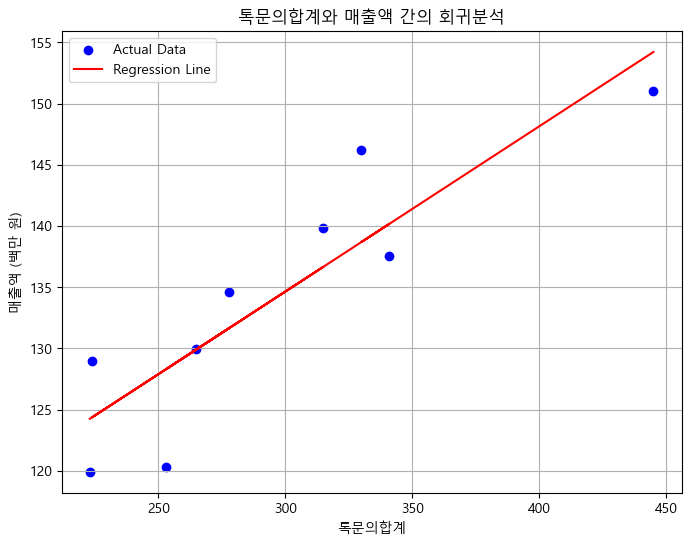

In [7]:
# 그래프 그려보기
plt.figure(figsize=(8, 6))
plt.scatter(data['톡문의합계'], data['매출액(백만)'], color='blue', label="Actual Data")
plt.plot(data['톡문의합계'], model_simple.predict(X_simple), color='red', label="Regression Line")
plt.xlabel("톡문의합계")
plt.ylabel("매출액 (백만 원)")
plt.title("톡문의합계와 매출액 간의 회귀분석")
plt.legend()
plt.grid(True)
plt.show()

# (23.01 ~ 23.09) 단순 회귀분석 해석
### R-squared (결정계수): 0.785 
- 톡문의합계 하나의 변수로 매출액 변동의 78.5%의 높은 설명력을 가짐

### P-value
톡문의합계: 0.00146 -> 유의미O  
=> 톡문의합계가 증가할수록 매출액이 유의미하게 증가

### 회귀계수
톡문의합계 계수: 0.1349  
-> 톡문의합계가 1 증가할 때 매출액이 약 0.1349백만 원(=134,900원) 증가

### 기타 사항
Durbin-Watson = 2.770 -> 잔차(오차) 간의 독립성이 유지됨 → 자기상관 문제 없음  
조건수(Cond. No.) = 1,400 -> 약간 높은 값이지만 심각한 다중공선성 문제는 없음 (보통 30,000 이상이면 다중공선성 심각 but, 보통 다중회귀분석에서 문제되는 부분으로 단순 회귀에서는 큰 문제가 아님)

## 해석
- 톡문의합계가 매출액과 강한 양의 관계를 가짐 (P = 0.00146, R² = 0.785)
- 톡문의합계가 증가하면 매출액이 유의미하게 증가하는 패턴
- 다중공선성 문제 없이 단일 변수로도 충분히 설명 가능

# 종합적인 한계
- 첨도 검정은 샘플 수가 20 이상일 때만 유효 but 현재 샘플이 9개라서 신뢰도가 낮음  
=> 데이터 개수가 적어서 정규성 검정의 결과를 신뢰하기 어려움

# 종합적인 결론
- 전화량이 아닌 톡문의합계가 증가하면 매출액도 유의미하게 증가하는 경향을 보임 (p값: 0.00146) 
- 그러나 현재 분석은 상관관계를 확인하는 것이므로 톡문의 증가가 매출 증가를 직접적으로 유발했다는 인과관계를 증명한 것은 아님  
- 광고 효과나 외부 요인도 매출 증가에 영향을 미쳤을 가능성이 있으므로 추가적인 인과관계 분석이 필요

# 분석 결과를 토대로 추가 분석 예상

### 응대 만족도가 구매 및 매출에 미치는 영향 분석
- 고객 응대 시 고객이 받는 느낌이 친절함 등 긍정적이라면 문의 후 구매로 바로 연결되는 형태일까?  
- 그렇다면 과연 응대 만족도가 구매 및 매출에 어느 정도의 관계를 가지게 될까?  
- 한계: 응대 만족도 조사 진행에 대한 자료가 미흡하고 문의자가 구매를 했는 지에 대한 파악이 어려움
=> 현재 데이터만으로는 응대 만족도와 매출 간의 관계를 정확히 분석할 수 없지만 추후 만족도 진행으로 데이터 확보 후 분석
=> 문의자별 구매 여부를 트래킹할 수 있는 데이터가 필요함

### 광고비 대비 매출 분석
- 해석 결과로는 톡문의합계가 매출 향상과 관계가 있다 but 인과관계는 아님
- 광고 효과에 따라 문의가 증가하고 그래서 매출이 향상된거라면 광고에 대한 매출 향상을 분석 필요
- 한계: 해당 시기 광고비용 등을 알기 어려워 분석 어려움 
=> 광고에 대한 데이터가 없어 매출과의 인과관계를 확인하기 어려움
=> 추후 광고를 집행하며 동시에 데이터를 수집하는 과정을 통해 분석 결과를 도출할 수 있음  
=> 월별 광고비를 추가하여 (매출액 ~ 톡문의합계 + 광고비) 분석을 통해 광고가 톡문의 증가를 유발한 것인지 아니면 고객이 원래부터 광고 없이 톡문의로 이동한 것인지 확인 가능 (but 파라미터를 통해 광고 유입인지에 대한 트래킹 데이터 필요)

### 제품별 판매수량과의 분석
- 위에서 언급한 매출액이 아닌 판매수량에 따른 분석도 함께 진행하고자 함
- 한계: 제품별 판매 수량에 대한 구체적인 데이터 부족
=> 제품별 판매수량 데이터 수집하여 문의량에 따른 판매수량 분석 진행

# => 제품별 판매수량, 응대 만족도 데이터, 광고비 데이터, 문의자별 광고 및 구매 여부 트래킹 데이터를 통해 추가적인 분석 진행 가능